In [3]:
# 1. Calculem les nostres dades i les guardem en llistes.

import json
from calcularAZS import calcular_cos_AZS
import math

LAT = 41.964
LON = 2.830

# Nom del fitxer JSON
nostres_fitxer = "C:/Users/PC/Documents/_PRACTIQUES_UDG/scripts/dadesComparativa/nostres_filtrades.json"

# Carreguem el fitxer JSON
with open(nostres_fitxer, "r") as f:
    dades = json.load(f)

# Inicialitzem llistes
dates = []
hores = []
G_teo_list = []
G_exp_list = []
dG_teo_list = []
dG_exp_list = []
AZS_cos = []
AZS = []
elevs = []
passaFiltre = []
timestamps = []

print(f"Nombre de objectes de dades al fitxer: {len(dades['data'])}")

# Per cada mesura, calcularem la radiació global teròrica i farem la comparació
for i, fila in enumerate(dades["data"]):
    data = fila["DATE"]
    hora = fila["HOUR"]
    B = fila["Beam_Avg"]
    D = fila["Diffuse_Avg"]
    G_exp = fila["Global_Avg"]
    dB = fila["Beam_Std"]
    dD = fila["Diffuse_Std"]
    dG_exp = fila["Global_Std"]
    passaFiltreHoritzo = fila["filtreHoritzo"]
    passaFiltreIrradiancia = fila["filtreIrradiancia"]
    timestamp = fila["TIMESTAMP"]

    if (not passaFiltreHoritzo) or (not passaFiltreIrradiancia):
        continue 

    # Calculem l'angle zenital solar (en radians)
    (cosAZS, dcosAZS) = calcular_cos_AZS(LAT, LON, data, hora)  # dAZS és la incertesa de l'angle
    AZS_rad = math.acos(cosAZS)  # Angle zenital solar
    AZS_deg = math.degrees(AZS_rad)
    dAZS = dcosAZS / math.sqrt(1 - cosAZS**2)

    # Calculem la radiació global teòrica (EQUACIÓ PRINCIPAL)
    G_teo = B * math.cos(AZS_rad) + D

    # Propagació d'incerteses
    dG_teo = math.sqrt(
        dD**2 +
        (math.cos(AZS_rad) * dB)**2 +
        (B * math.sin(AZS_rad) * dAZS)**2
    )

    # Guardem els valors a les llistes
    timestamps.append(timestamp)
    dates.append(data)
    hores.append(hora)
    G_teo_list.append(G_teo)
    G_exp_list.append(G_exp)
    dG_teo_list.append(dG_teo)
    dG_exp_list.append(dG_exp)
    AZS_cos.append(cosAZS)
    AZS.append(AZS_deg)
    elevs.append(90 - AZS_deg)
    passaFiltre.append(passaFiltreHoritzo and passaFiltreIrradiancia)

    if i % 3000 == 0:
        print(f"Processada fila {i}")

print(f"Ja hem acabat. Registres processats: {len(dates)}")

Nombre de objectes de dades al fitxer: 22620
Ja hem acabat. Registres processats: 9074


In [2]:
#a

In [4]:
# 2. Guardem les dades de l'ICAEN en llistes

import json
import numpy as np

# Nom del fitxer JSON
icaen_fitxer = f"C:/Users/PC/Documents/_PRACTIQUES_UDG/scripts/dadesComparativa/icaen_bones.json"

# Carreguem el fitxer JSON
with open(icaen_fitxer, "r") as f:
    dades = json.load(f)

# Inicialitzem llistes
dates = []
hores = []
PYR1 = []
PYR2 = []
PYR3 = []
PYR4 = []
PYR5 = []
PYR6 = []
series = []
filtrePassat = []

print(f"Nombre de objectes de dades al fitxer: {len(dades['data'])}")

# Per cada mesura, ens guardem les dades en llistes
for i, fila in enumerate(dades["data"]):

    data = fila["DATE"]
    hora = fila["HOUR"]
    P1 = fila["PYR1"]
    P2 = fila["PYR2"]
    P3 = fila["PYR3"]
    P4 = fila["PYR4"]
    P5 = fila["PYR5"]
    P6 = fila["PYR6"]
    serie = fila ["SERIE"]
    filtrePassatHoritzo = fila["filtreHoritzo"]
    filtrePassatIrradiancia = fila["filtreIrradiancia"]

    if (not filtrePassatHoritzo) or (not filtrePassatIrradiancia):
        continue

    # Guardem els valors a les llistes
    dates.append(data)
    hores.append(hora)
    PYR1.append(P1)
    PYR2.append(P2)
    PYR3.append(P3)
    PYR4.append(P4)
    PYR5.append(P5)
    PYR6.append(P6)
    series.append(serie)
    filtrePassat.append(filtrePassatHoritzo and filtrePassatIrradiancia)

    if i % 2000 == 0:
        print(f"Processada fila {i}")

print(f"Ja hem acabat. Registres processats: {len(dates)}")

Nombre de objectes de dades al fitxer: 22620
Processada fila 2000
Processada fila 8000
Processada fila 20000
Processada fila 22000
Ja hem acabat. Registres processats: 9074


In [ ]:
# Ara ens guardarem les dades en un nou fitxer: resultats.json
# Quee serà una combinació de icaen_bones.json i nostres_filtrades.json
# El format serà:
"""
{
    "data": [
        {
            "TIMESTAMP": timestamp,
            "DATE": date,
            "HOUR": hour,
            "Glob_teo": G_teo,
            "Glob_exp": G_exp,
            "cos_AZS": cosAZS,
            "AZS": AZS_deg,
            "Elev": elev_deg,
            "passaFiltre": passaFiltre
            "SERIE": serie,
            "PYR1": P1,
            "PYR2": P2,
            "PYR3": P3,
            "PYR4": P4,
            "PYR5": P5,
            "PYR6": P6,
            "S1_e": cal_exp_PYR1,
            "S2_e": cal_exp_PYR2,
            "S3_e": cal_exp_PYR3,
            "S4_e": cal_exp_PYR4,
            "S5_e": cal_exp_PYR5,
            "S6_e": cal_exp_PYR6,
            "O1_e": offset_exp_PYR1,
            "O2_e": offset_exp_PYR2,
            "O3_e": offset_exp_PYR3,
            "O4_e": offset_exp_PYR4,
            "O5_e": offset_exp_PYR5,
            "O6_e": offset_exp_PYR6,
            "R2_1_e": r2_1_e,
            "R2_2_e": r2_2_e,
            "R2_3_e": r2_3_e,
            "R2_4_e": r2_4_e,
            "R2_5_e": r2_5_e,
            "R2_6_e": r2_6_e,
            "S1_t": cal_teo_PYR1,
            "S2_t": cal_teo_PYR2,
            "S3_t": cal_teo_PYR3,
            "S4_t": cal_teo_PYR4,
            "S5_t": cal_teo_PYR5,
            "S6_t": cal_teo_PYR6
            "O1_t": offset_teo_PYR1,
            "O2_t": offset_teo_PYR2,
            "O3_t": offset_teo_PYR3,
            "O4_t": offset_teo_PYR4,
            "O5_t": offset_teo_PYR5,
            "O6_t": offset_teo_PYR6
            "R2_1_t": r2_1_t,
            "R2_2_t": r2_2_t,
            "R2_3_t": r2_3_t,
            "R2_4_t": r2_4_t,
            "R2_5_t": r2_5_t,
            "R2_6_t": r2_6_t
        }
    ]
}
"""

# Així que el que hem de fer és clacular ara les regressions lineals per determinar el factor de calibratge (S) i l'offset (O) de cada piranòmetre aixi com el coeficient R2 de la regressio.
# Ho fem analitzant les dades de l'ICAEN contra les nostres d'irradiància global

# Primer farem els càlculs (i generarem les llistes corresponents) per la regressió a partir de G_exp_list

# Inicialitzem llistes
s1_e = []
s2_e = []
s3_e = []
s4_e = []
s5_e = []
s6_e = []
o1_e = []
o2_e = []
o3_e = []
o4_e = []
o5_e = []
o6_e = []
r2_1_e = []
r2_2_e = []
r2_3_e = []
r2_4_e = []
r2_5_e = []
r2_6_e = []

# Càlculs

PYR_lists = [PYR1, PYR2, PYR3, PYR4, PYR5, PYR6]
X = np.array(G_exp_list)

for PYR in zip(PYR_lists):
    Y = np.array([PYR[i]) * 1000  # mV a μV
    coef, cov = np.polyfit(X, Y, 1, cov=True)
    ss_res = np.sum((Y - (coef[0]*X + coef[1]))**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    r2 = 1 - ss_res/ss_tot
    err_coef = np.sqrt(np.diag(cov))
    x_fit = np.linspace(min(X), max(X), 100)
    y_fit = coef[0]*x_fit + coef[1]
        
    LLISTA.append(element)

# I ara el mateix però per G_teo_list

In [9]:
import numpy as np

# Inicialitzem llistes
s1_e, s2_e, s3_e, s4_e, s5_e, s6_e = [], [], [], [], [], []
o1_e, o2_e, o3_e, o4_e, o5_e, o6_e = [], [], [], [], [], []
r2_1_e, r2_2_e, r2_3_e, r2_4_e, r2_5_e, r2_6_e = [], [], [], [], [], []

s1_t, s2_t, s3_t, s4_t, s5_t, s6_t = [], [], [], [], [], []
o1_t, o2_t, o3_t, o4_t, o5_t, o6_t = [], [], [], [], [], []
r2_1_t, r2_2_t, r2_3_t, r2_4_t, r2_5_t, r2_6_t = [], [], [], [], [], []

PYR_lists = [PYR1, PYR2, PYR3, PYR4, PYR5, PYR6]
list_exp_s = [s1_e, s2_e, s3_e, s4_e, s5_e, s6_e]
list_exp_o = [o1_e, o2_e, o3_e, o4_e, o5_e, o6_e]
list_exp_r2 = [r2_1_e, r2_2_e, r2_3_e, r2_4_e, r2_5_e, r2_6_e]

list_teo_s = [s1_t, s2_t, s3_t, s4_t, s5_t, s6_t]
list_teo_o = [o1_t, o2_t, o3_t, o4_t, o5_t, o6_t]
list_teo_r2 = [r2_1_t, r2_2_t, r2_3_t, r2_4_t, r2_5_t, r2_6_t]

X_exp = np.array(G_exp_list)
X_teo = np.array(G_teo_list)
n = len(series)

for serie in [1, 2]:
    indices_serie = [i for i, s in enumerate(series) if s == serie]
    # Per cada piranòmetre
    for idx, PYR in enumerate(PYR_lists):
        Y = np.array(PYR)[indices_serie] * 1000  # mV a μV
        # Exp
        X_valid_exp = X_exp[indices_serie]
        mask_exp = (~np.isnan(X_valid_exp)) & (~np.isnan(Y))
        X_valid_exp = X_valid_exp[mask_exp]
        Y_valid_exp = Y[mask_exp]
        if len(X_valid_exp) > 1:
            coef_exp, cov_exp = np.polyfit(X_valid_exp, Y_valid_exp, 1, cov=True)
            ss_res_exp = np.sum((Y_valid_exp - (coef_exp[0]*X_valid_exp + coef_exp[1]))**2)
            ss_tot_exp = np.sum((Y_valid_exp - np.mean(Y_valid_exp))**2)
            r2_exp = 1 - ss_res_exp/ss_tot_exp
        else:
            coef_exp = [np.nan, np.nan]
            r2_exp = np.nan
        # Teo
        X_valid_teo = X_teo[indices_serie]
        mask_teo = (~np.isnan(X_valid_teo)) & (~np.isnan(Y))
        X_valid_teo = X_valid_teo[mask_teo]
        Y_valid_teo = Y[mask_teo]
        if len(X_valid_teo) > 1:
            coef_teo, cov_teo = np.polyfit(X_valid_teo, Y_valid_teo, 1, cov=True)
            ss_res_teo = np.sum((Y_valid_teo - (coef_teo[0]*X_valid_teo + coef_teo[1]))**2)
            ss_tot_teo = np.sum((Y_valid_teo - np.mean(Y_valid_teo))**2)
            r2_teo = 1 - ss_res_teo/ss_tot_teo
        else:
            coef_teo = [np.nan, np.nan]
            r2_teo = np.nan
        # Omple llistes amb valors constants per cada registre de la sèrie corresponent
        for i in range(n):
            if series[i] == serie:
                list_exp_s[idx].append(coef_exp[0])
                list_exp_o[idx].append(coef_exp[1])
                list_exp_r2[idx].append(r2_exp)
                list_teo_s[idx].append(coef_teo[0])
                list_teo_o[idx].append(coef_teo[1])
                list_teo_r2[idx].append(r2_teo)

print(s1_e[0])

4.510915190084676


In [ ]:
# Ara sí, guardem les dades en un nou fitxer: resultats.json

import json

resultats = {"data": []}
n = len(timestamps)

for i in range(n):
    fila = {
        "TIMESTAMP": timestamps[i],
        "DATE": dates[i],
        "HOUR": hores[i],
        "Glob_exp": G_exp_list[i],
        "Glob_teo": G_teo_list[i],
        "cos_AZS": AZS_cos[i],
        "AZS": AZS[i],
        "Elev": elevs[i],
        # "passaFiltre": passaFiltre[i],
        "SERIE": series[i],
        "PYR1": PYR1[i],
        "PYR2": PYR2[i],
        "PYR3": PYR3[i],
        "PYR4": PYR4[i],
        "PYR5": PYR5[i],
        "PYR6": PYR6[i],
        "S1_e": s1_e[i],
        "S2_e": s2_e[i],
        "S3_e": s3_e[i],
        "S4_e": s4_e[i],
        "S5_e": s5_e[i],
        "S6_e": s6_e[i],
        "O1_e": o1_e[i],
        "O2_e": o2_e[i],
        "O3_e": o3_e[i],
        "O4_e": o4_e[i],
        "O5_e": o5_e[i],
        "O6_e": o6_e[i],
        "R2_1_e": r2_1_e[i],
        "R2_2_e": r2_2_e[i],
        "R2_3_e": r2_3_e[i],
        "R2_4_e": r2_4_e[i],
        "R2_5_e": r2_5_e[i],
        "R2_6_e": r2_6_e[i],
        "S1_t": s1_t[i],
        "S2_t": s2_t[i],
        "S3_t": s3_t[i],
        "S4_t": s4_t[i],
        "S5_t": s5_t[i],
        "S6_t": s6_t[i],
        "O1_t": o1_t[i],
        "O2_t": o2_t[i],
        "O3_t": o3_t[i],
        "O4_t": o4_t[i],
        "O5_t": o5_t[i],
        "O6_t": o6_t[i],
        "R2_1_t": r2_1_t[i],
        "R2_2_t": r2_2_t[i],
        "R2_3_t": r2_3_t[i],
        "R2_4_t": r2_4_t[i],
        "R2_5_t": r2_5_t[i],
        "R2_6_t": r2_6_t[i]
    }
    resultats["data"].append(fila)

with open("C:/Users/PC/Documents/_PRACTIQUES_UDG/scripts/dadesComparativa/resultats.json", "w") as f:
    json.dump(resultats, f, indent=2)

In [ ]:
# I ara agafarem el fitxer resultats.json que és del tipus:
"""
{
  "data": [
    {
      "TIMESTAMP": "2025-06-18 05:30:00",
      "DATE": "2025-06-18",
      "HOUR": "05:30:00",
      "Glob_exp": 144.8,
      "Glob_teo": 137.4096050868441,
      "cos_AZS": 0.20808742689773027,
      "AZS": 77.98970592168037,
      "Elev": 12.010294078319632,
      "SERIE": 1,
      "PYR1": 0.634,
      "PYR2": 0.648,
      "PYR3": 0.61,
      "PYR4": 1.399,
      "PYR5": 1.251,
      "PYR6": 1.11,
      "S1_e": 4.510915190084676,
      "S2_e": 4.68138699677484,
      "S3_e": 4.511824391920402,
      "S4_e": 10.450886470165022,
      "S5_e": 8.869967416530288,
      "S6_e": 7.892469114458548,
      "O1_e": -32.74675239973325,
      "O2_e": -46.61889168658845,
      "O3_e": -61.02563816958107,
      "O4_e": -142.7833491958681,
      "O5_e": -46.137595518817854,
      "O6_e": -49.816106178265414,
      "R2_1_e": 0.9992609946219516,
      "R2_2_e": 0.9992458557031528,
      "R2_3_e": 0.9993808583017529,
      "R2_4_e": 0.9992820915458991,
      "R2_5_e": 0.9995762576666399,
      "R2_6_e": 0.9996556270769132,
      "S1_t": 4.560584386105736,
      "S2_t": 4.7327338777255195,
      "S3_t": 4.561882186790125,
      "S4_t": 10.568664728277211,
      "S5_t": 8.96766242840019,
      "S6_t": 7.979448663327763,
      "O1_t": 15.675510887649747,
      "O2_t": 3.7609499511698985,
      "O3_t": -12.836031292082843,
      "O4_t": -32.33052555372675,
      "O5_t": 49.058343708928234,
      "O6_t": 34.856390975333035,
      "R2_1_t": 0.9988965269052809,
      "R2_2_t": 0.9987972451114259,
      "R2_3_t": 0.9991821829834153,
      "R2_4_t": 0.9994290894573854,
      "R2_5_t": 0.9992180855168773,
      "R2_6_t": 0.9993101590191424
    }
"""
# I el convertirem a fitxer CSV per a la seva visualització amb Excel
# Cada fila serà un registre (un minut diferent) i cada columna serà un camp diferent en el mateix ordre que el json.

import json
import csv

# Carrega el fitxer JSON
with open("C:/Users/PC/Documents/_PRACTIQUES_UDG/scripts/dadesComparativa/resultats.json", "r") as f:
    dades = json.load(f)

# Obté les claus (columnes) de la primera fila
columnes = list(dades["data"][0].keys())

# Escriu el fitxer CSV
with open("C:/Users/PC/Documents/_PRACTIQUES_UDG/scripts/dadesComparativa/resultats.csv", "w", newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=columnes)
    writer.writeheader()
    for fila in dades["data"]:
        writer.writerow(fila)

In [17]:
# CSV amb només 4 decimals per a les dades numèriques

import json
import csv

def format_num(x):
    if isinstance(x, float):
        return f"{x:.4f}".replace('.', ',')
    return x

with open("C:/Users/PC/Documents/_PRACTIQUES_UDG/scripts/dadesComparativa/resultats.json", "r") as f:
    dades = json.load(f)

columnes = list(dades["data"][0].keys())

with open("C:/Users/PC/Documents/_PRACTIQUES_UDG/scripts/dadesComparativa/results.csv", "w", newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=columnes, delimiter=';')
    writer.writeheader()
    for fila in dades["data"]:
        fila_format = {k: format_num(v) for k, v in fila.items()}
        writer.writerow(fila_format)

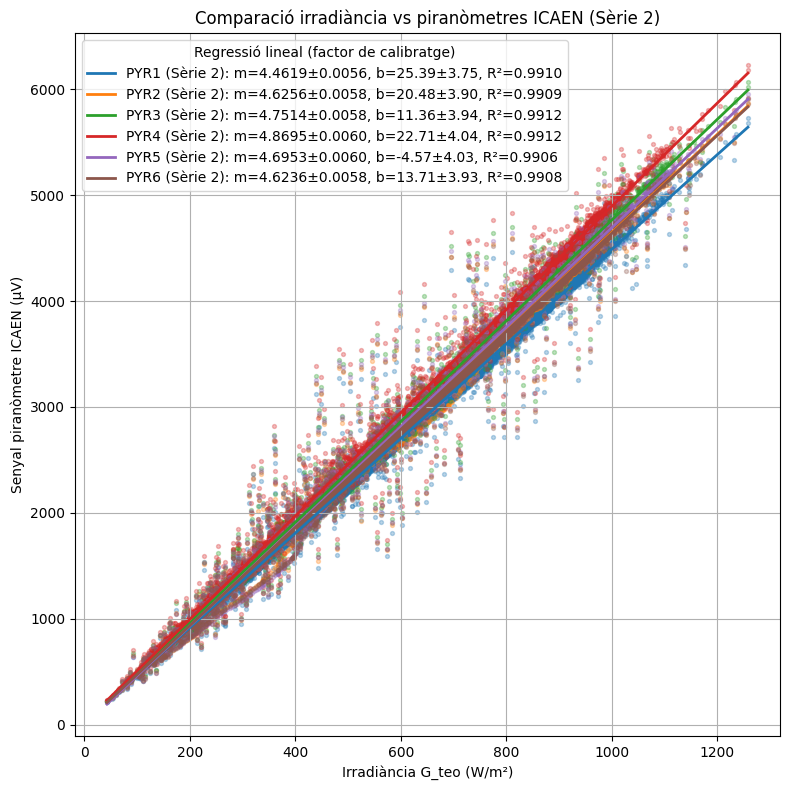

In [ ]:
# 3. Fem el gràfic comparatiu entre les nostres dades i les de l'ICAEN
# Però tenint en compte la sèrie de piranòmetres (1 o 2)

import numpy as np
import matplotlib.pyplot as plt

vsExp = True # True si volem comparar amb G_exp_list, False si volem comparar amb G_teo_list

serie_escollida = 2 # Selecciona la sèrie (1 o 2)
piranometresSeleccionats = {'PYR1','PYR2','PYR3','PYR4','PYR5','PYR6'} # Exemple: {'PYR5', 'PYR3'}

# Selecciona l'eix X: G_exp_list o G_teo_list
X = np.array(G_exp_list) if vsExp else np.array(G_teo_list)

# Llistes de piranòmetres
PYR_lists = [PYR1, PYR2, PYR3, PYR4, PYR5, PYR6]
labels = ['PYR1', 'PYR2', 'PYR3', 'PYR4', 'PYR5', 'PYR6']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

plt.figure(figsize=(8,8))

# Filtra els índexs de la sèrie escollida
indices_serie = [i for i, s in enumerate(series) if s == serie_escollida]
X_filtrat = X[indices_serie]

for PYR, color, label in zip(PYR_lists, colors, labels):
    if label not in piranometresSeleccionats:
        continue

    # Filtra les dades del piranòmetre per la sèrie escollida
    Y_filtrat = np.array([PYR[i] for i in indices_serie]) * 1000  # mV a μV

    mask = (~np.isnan(X_filtrat)) & (~np.isnan(Y_filtrat))
    X_valid = X_filtrat[mask]
    Y_valid = Y_filtrat[mask]

    if len(X_valid) > 1 and len(Y_valid) > 1:
        coef, cov = np.polyfit(X_valid, Y_valid, 1, cov=True)
        ss_res = np.sum((Y_valid - (coef[0]*X_valid + coef[1]))**2)
        ss_tot = np.sum((Y_valid - np.mean(Y_valid))**2)
        r2 = 1 - ss_res/ss_tot
        err_coef = np.sqrt(np.diag(cov))
        x_fit = np.linspace(min(X_valid), max(X_valid), 100)
        y_fit = coef[0]*x_fit + coef[1]
        plt.plot(x_fit, y_fit, '-', color=color, linewidth=2,
                 label=f"{label} (Sèrie {serie_escollida}): m={coef[0]:.4f}±{err_coef[0]:.4f}, b={coef[1]:.2f}±{err_coef[1]:.2f}, R²={r2:.4f}")
        plt.scatter(X_valid, Y_valid, s=8, color=color, alpha=0.3)
    else:
        print(f"No hi ha dades suficients per {label} (Sèrie {serie_escollida})")

plt.xlabel(f'Irradiància {"G_exp" if vsExp else "G_teo"} (W/m²)')
plt.ylabel('Senyal piranòmetre ICAEN (μV)')
plt.title(f'Comparació irradiància vs piranòmetres ICAEN (Sèrie {serie_escollida})')
plt.legend(title="Regressió lineal (factor de calibratge)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Factors de calibratge de cada piranòmetre
# Serie 1, Serie 2
# Exp | Teo | Mean | Std
factors_calibratges = {
    1: {
        'PYR1': [4.51, 4.56],
        'PYR2': [4.68, 4.73],
        'PYR3': [4.51, 4.56],
        'PYR4': [10.45, 10.57],
        'PYR5': [8.87, 8.97],
        'PYR6': [7.89, 7.98]
    },
    2: {
        'PYR1': [4.44, 4.46],
        'PYR2': [4.60, 4.63],
        'PYR3': [4.73, 4.75],
        'PYR4': [4.85, 4.87],
        'PYR5': [4.67, 4.70],
        'PYR6': [4.60, 4.62]
    }
}
calibratges = {}
for serie, pyrs in factors_calibratges.items():
    calibratges[serie] = {}
    for pyr, values in pyrs.items():
        mean_value = np.mean(values)
        std_value = np.std(values) / np.sqrt(len(values))
        calibratges[serie][pyr] = [values[0], values[1], mean_value, std_value]

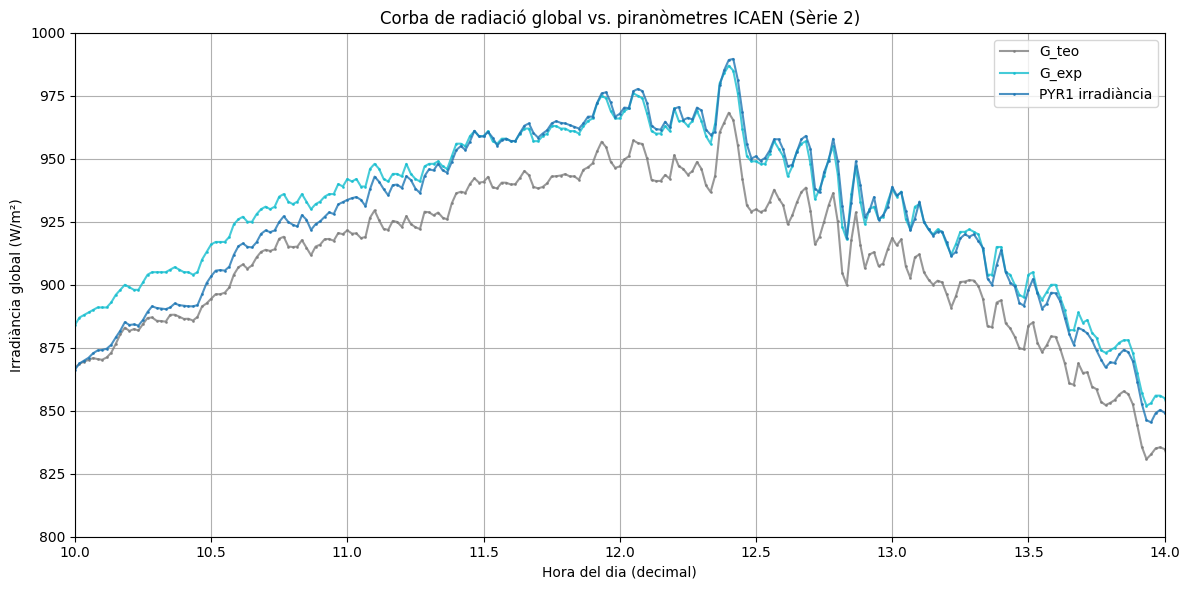

In [37]:
# Serie 1: ("2025-06-18", "2025-06-26")
# Serie 2: ("2025-07-02", "2025-07-14")

dies_seleccionats = {
    "2025-07-02", 
    # "2025-06-24"
}
serie_escollida = 2 # Selecciona la sèrie (1 o 2)
piranometresSeleccionats = {'PYR1'} # Exemple: {'PYR5', 'PYR3'}

# Llistes de piranòmetres
PYR_lists = [PYR1, PYR2, PYR3, PYR4, PYR5, PYR6]
labels = ['PYR1', 'PYR2', 'PYR3', 'PYR4', 'PYR5', 'PYR6']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# plt.figure(figsize=(8,8))

# Filtra els índexs de la sèrie escollida
indices_serie = [i for i, (s, d) in enumerate(zip(series, dates)) if s == serie_escollida and d in dies_seleccionats]
X_filtrat = X[indices_serie]
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Converteix hores a decimals
hores_decimals = []
for h in np.array(hores)[indices_serie]:
    parts = str(h).split(':')
    hora_decimal = int(parts[0]) + int(parts[1])/60 + int(parts[2])/3600
    hores_decimals.append(hora_decimal)
hores_decimals = np.array(hores_decimals)

# Filtra G_teo i G_exp per la sèrie escollida
G_teo_filtrat = np.array(G_teo_list)[indices_serie]
G_exp_filtrat = np.array(G_exp_list)[indices_serie]

# Grafica G_teo i G_exp
plt.plot(hores_decimals, G_teo_filtrat, 'o-', markersize=1, label='G_teo', color='tab:gray', alpha=0.8)
plt.plot(hores_decimals, G_exp_filtrat, 'o-', markersize=1, label='G_exp', color='tab:cyan', alpha=0.8)

# Grafica irradiància dels piranòmetres seleccionats
for PYR, color, label in zip(PYR_lists, colors, labels):
    if label not in piranometresSeleccionats:
        continue

    Y_filtrat = np.array([PYR[i] for i in indices_serie]) * 1000  # mV a μV
    Y_irradiancia = Y_filtrat / calibratges[serie_escollida][label][2] # Factor de calibratge mitjà
    plt.plot(hores_decimals, Y_irradiancia, 'o-', markersize=1, label=f'{label} irradiància', color=color, alpha=0.8)

plt.xlabel('Hora del dia (decimal)')
plt.ylabel('Irradiància global (W/m²)')
plt.title(f'Corba de radiació global vs. piranòmetres ICAEN (Sèrie {serie_escollida})')
# plt.xlim(5, 19)
# plt.ylim(bottom=0)
plt.xlim(10,14)
plt.ylim(800,1000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()